<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%90%D1%83%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_Keras_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аугментация данных с помощью Keras ImageDataGenerator

# Data Augmentation with Keras ImageDataGenerator

В этом уроке вы узнаете, как использовать класс Keras ImageDataGenerator для увеличения количества данных.

In this tutorial, you will learn how to use the Keras ImageDataGenerator class to increase the amount of data.



Класс ImageDataGenerator  работает следующим образом:

The ImageDataGenerator class works like this:


* Берет батч с изображениями, используемых для обучения. Takes a batch of images used for training.
* Применяет серию случайных преобразований к каждому изображению в батче(включая случайное вращение, изменение размера, сдвиг и т. Д.). Applies a series of random transformations to each image in the batch (including random rotation, resizing, shearing, etc.).
* Заменяет исходный батч новым, случайно преобразованным батчом. Replaces the original batch with a new, randomly converted batch.



Обучение CNN происходит на этом случайно преобразованном батче (т.е. исходные данные не используется для обучения).
То есть ImageDataGenerator принимает исходные данные, случайным образом преобразует их и возвращает только новые преобразованные данные.


CNN training takes place on this randomly transformed batch (i.e. the original data is not used for training).
That is, the ImageDataGenerator takes the original data, transforms it randomly, and only returns the new transformed data.

### Загрузка файлов
### Download the code zip file

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_32.keras_data_augmentation.zip
!unzip -qq Lesson_32.keras_data_augmentation.zip
%cd /content/Lesson_32.keras_data_augmentation

--2022-02-21 05:31:42--  http://dataudt.ru/datasets/cv/Lesson_32.keras_data_augmentation.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94330597 (90M) [application/zip]
Saving to: ‘Lesson_32.keras_data_augmentation.zip’

Lesson_32.keras_dat 100%[===================>]  89.96M  44.8MB/s    in 2.0s    

2022-02-21 05:31:44 (44.8 MB/s) - ‘Lesson_32.keras_data_augmentation.zip’ saved [94330597/94330597]

/content/Lesson_32.keras_data_augmentation


### Импорт библиотек
### Import Packages

In [2]:
# импортируем необходимые библиотеки
# import the necessary packages
from network.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

### Реализация нашего обучающего скрипта
### Implementing our training script

Создадим аугментации для датасета с котами.

In [3]:
# явно укажем аргументы необходимые для работы
# image - путь к примеру для аугментирования
# output - выходная директория
# total - количество выходных аугментаций
# explicitly specify the arguments required for work
# image - path to example for augmentation
# output - output directory
# total - number of output augmentations
args = {
	"image": "dogs_vs_cats_small/cats/cat.1999.jpg",
	"output": "generated_dataset/cats",
    'total':10
}

# раскоментируйте следующие строки, чтобы сделать то же самое для собак

#args = {
#	"image": "dogs_vs_cats_small/dogs/dog.2000.jpg",
#	"output": "generated_dataset/dogs",
#    'total':10
#}


In [4]:
# загружаем входное изображение, преобразуем его в массив NumPy, а затем
# добавляем ему дополнительную размерность
# load the input image, convert it to a NumPy array, and then
# reshape it to have an extra dimension
print("[INFO] loading example image...")
image = load_img(args["image"])
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# создаем генератор изображений для аугментации данных, затем
# инициализируем общее количество изображений, сгенерированных на данный момент
# construct the image generator for data augmentation then
# initialize the total number of images generated thus far
aug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
total = 0

# создаем генератор Python
# construct the actual Python generator
print("[INFO] generating images...")
imageGen = aug.flow(image, batch_size=1, save_to_dir=args["output"],
	save_prefix="image", save_format="jpg")

# перебираем примеры из нашего генератора аугментации изображений
# loop over examples from our image data augmentation generator
for image in imageGen:
	# увеличиваем наш счетчик
    # increment our counter
	total += 1

	# если мы достигли указанного количества примеров, прерываем цикл
    # if we have reached the specified number of examples, break
	# from the loop
	if total == args["total"]:
		break

[INFO] loading example image...
[INFO] generating images...


In [5]:

# явно укажем аргументы необходимые для работы
# dataset - путь к входному набору данных
# augment - использовать или нет "на лету" наращивание данных
# plot - путь к выходному графику потерь/точности

# explicitly specify the arguments needed to work
# dataset - path to input dataset
# augment - whether or not 'on the fly' data augmentation should be used
#  plot - path to output loss/accuracy plot
#args = {
#	"dataset": "dogs_vs_cats_small",
#	"augment": -1,
#	"plot": "plot_generated_dataset.png"
#}

# раскомментируйте, если хотите выбрать следующие настройки
# без аугментаций
# uncomment the following settings as necessary
# # no augmentation
# args = {
# 	"dataset": "dogs_vs_cats_small",
# 	"augment": -1,
# 	"plot": "plot_dogs_vs_cats_no_aug.png"
# }

# с аугментацией
# # augmentation
args = {
 	"dataset": "dogs_vs_cats_small",
 	"augment": 1,
 	"plot": "plot_dogs_vs_cats_with_aug.png"
}

In [6]:
# определяем общее количество эпох для тренировки вместе с шагом обучения и размером батча
# initialize the initial learning rate, batch size, and number of
# epochs to train for
INIT_LR = 1e-1
BS = 8
EPOCHS = 50

# возьмем список изображений в нашем датасете, затем инициализируем
# список данных (т.е. изображений) и классов  изображений
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

# перебираем пути к изображениям
# loop over the image paths
for imagePath in imagePaths:
    # извлекаем метку класса из имени файла, загружаем изображение и
	# изменяем его размер до фиксированного 64x64 пикселя, игнорируя соотношение сторон
	# extract the class label from the filename, load the image, and
	# resize it to be a fixed 64x64 pixels, ignoring aspect ratio
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (64, 64))
    # обновляем списки данных и меток соответственно
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

[INFO] loading images...


In [7]:
# конвертируем данные в массив NumPy, затем нормируем
# все пиксели яркости в диапазоне [0, 1]
# convert the data into a NumPy array, then preprocess it by scaling
# all pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

# кодируем метки (которые в настоящее время являются строками) как целые числа, а затем применяем
# one-hot encoding
# encode the labels (which are currently strings) as integers and then
# one-hot encode them
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels, 2)

# разделяем данные на обучающую и тестовую выборку, используя 75%
# данные для обучения и оставшиеся 25% для тестирования
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

In [8]:
# инициализируем генератор аугментаций как "пустой" генератор изображений
# initialize an our data augmenter as an "empty" image data generator
aug = ImageDataGenerator()

In [9]:
# проверяем, применяем ли мы увеличение данных в данный момент, и
# если это так, повторно создать экземпляр объекта
# check to see if we are applying "on the fly" data augmentation, and
# if so, re-instantiate the object
if args["augment"] > 0:
	print("[INFO] performing 'on the fly' data augmentation")
	aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

[INFO] performing 'on the fly' data augmentation


In [10]:
# инициализируем оптимизатор и модель
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / EPOCHS)
model = ResNet.build(64, 64, 3, 2, (2, 3, 4),
	(32, 64, 128, 256), reg=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# обучаем сеть
# train the network
print("[INFO] training network for {} epochs...".format(EPOCHS))
H = model.fit(
	x=aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


[INFO] training network for 50 epochs...
Epoch 1/50
375/375 [==============================] - 28s 37ms/step - loss: 0.9310 - accuracy: 0.5212 - val_loss: 0.8928 - val_accuracy: 0.5425
Epoch 2/50
375/375 [==============================] - 12s 33ms/step - loss: 0.8653 - accuracy: 0.5566 - val_loss: 0.8349 - val_accuracy: 0.6054
Epoch 3/50
375/375 [==============================] - 13s 34ms/step - loss: 0.8450 - accuracy: 0.5760 - val_loss: 0.8082 - val_accuracy: 0.6354
Epoch 4/50
375/375 [==============================] - 12s 31ms/step - loss: 0.8227 - accuracy: 0.6020 - val_loss: 0.7854 - val_accuracy: 0.6523
Epoch 5/50
375/375 [==============================] - 12s 31ms/step - loss: 0.8100 - accuracy: 0.6107 - val_loss: 0.7896 - val_accuracy: 0.6523
Epoch 6/50
375/375 [==============================] - 12s 31ms/step - loss: 0.7961 - accuracy: 0.6264 - val_loss: 0.7772 - val_accuracy: 0.6503
Epoch 7/50
375/375 [==============================] - 12s 31ms/step - loss: 0.7908 - accuracy: 

Обучение займет примерно час.

The training will take about an hour.

In [11]:
model.save('model.h5')

При желании можно загрузить уже обученную модель, чтобы не обучать ее повторно.

You can load an already trained model so as not to train it again.

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [12]:
# оцениваем сеть
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x=testX.astype("float32"), batch_size=BS)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=le.classes_))



[INFO] evaluating network...
              precision    recall  f1-score   support

        cats       0.81      0.76      0.79       474
        dogs       0.80      0.84      0.82       527

    accuracy                           0.81      1001
   macro avg       0.81      0.80      0.80      1001
weighted avg       0.81      0.81      0.80      1001



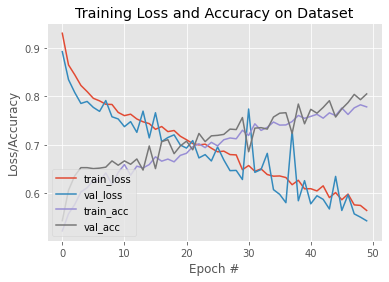

In [13]:
# построим графики функций потерь при обучении и графики точности
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])